In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df=pd.get_dummies(movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [4]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000,...,0.100000,0.100000,0.100000,0.600000,0.100000,0.100000,0.100000,0.400000,0.200000,0.100000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637,...,0.316228,0.316228,0.316228,0.516398,0.316228,0.316228,0.316228,0.516398,0.421637,0.316228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
frequent_itemsets_1= apriori(df,
                            min_support=0.3,
                            use_colnames=True)
frequent_itemsets_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa..."
59,0.4,"(V1_Gladiator, V3_Sixth Sense, Sixth Sense, Gl..."
60,0.4,"(V1_Gladiator, Sixth Sense, V3_Sixth Sense, V2..."
61,0.4,"(V1_Gladiator, V3_Sixth Sense, Gladiator, V2_P..."


In [6]:
frequent_itemsets_2 = apriori(df,
                            min_support=0.5,
                            use_colnames=True)
frequent_itemsets_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(Patriot, V1_Gladiator)"


In [7]:
rules_1 = association_rules(frequent_itemsets_1, metric="lift", min_threshold=0.5)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, Gladiator, V2_Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(Sixth Sense),"(Gladiator, V1_Gladiator, V3_Sixth Sense, V2_P...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Gladiator),"(V1_Gladiator, Sixth Sense, V3_Sixth Sense, V2...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(V2_Patriot),"(Gladiator, V1_Gladiator, Sixth Sense, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [8]:
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.5)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


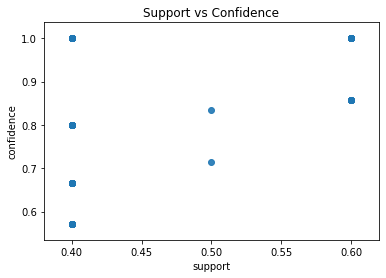

In [9]:
import matplotlib.pyplot as plt
plt.scatter(rules_1['support'], rules_1['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# min_support = 0.3

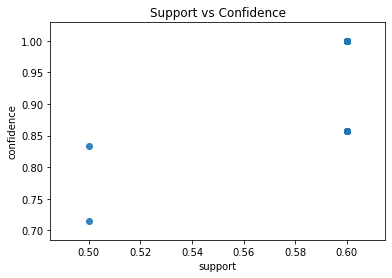

In [10]:
import matplotlib.pyplot as plt
plt.scatter(rules_2['support'], rules_2['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# min_support = 0.5

# pgrowth Algorithms

In [33]:
transactions = []
for sublist in df.values.tolist():
    clean_sublist = [item for item in sublist if item is not np.nan]
    transactions.append(clean_sublist)

In [34]:
transactions_1

[[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [36]:
import pyfpgrowth

In [37]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)
patterns

{(1, 1, 1, 1, 1, 1, 1, 1, 1): 10,
 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1): 150,
 (0, 1, 1, 1, 1, 1, 1, 1, 1): 692,
 (0, 0, 1, 1, 1, 1, 1, 1, 1, 1): 4861,
 (0, 1, 1, 1, 1, 1, 1, 1): 1936,
 (0, 0, 1, 1, 1, 1, 1, 1, 1): 13688,
 (0, 1, 1, 1, 1, 1, 1): 3721,
 (0, 0, 1, 1, 1, 1, 1, 1): 26713,
 (0, 1, 1, 1, 1, 1): 5302,
 (0, 0, 1, 1, 1, 1, 1): 39206,
 (0, 1, 1, 1, 1): 5828,
 (0, 0, 1, 1, 1, 1): 45025,
 (0, 1, 1, 1): 4904,
 (0, 0, 1, 1, 1): 39836,
 (0, 1, 1): 2954,
 (0, 0, 1, 1): 25138,
 (0, 1): 1108,
 (0, 0, 1): 9788,
 (0,): 190,
 (0, 0): 1726}

In [38]:
Fp_rules = pyfpgrowth.generate_association_rules(patterns, 0.5)

In [39]:
Fp_rules

{(0,): ((), 9.08421052631579),
 (1, 1, 1, 1, 1, 1, 1, 1, 1): ((0,), 15.0),
 (0, 1): ((), 8.833935018050541),
 (0, 0): ((1,), 5.670915411355736),
 (0, 1, 1): ((), 8.509817197020988),
 (0, 1, 1, 1): ((), 8.123164763458401),
 (0, 1, 1, 1, 1): ((), 7.725634866163349),
 (0, 1, 1, 1, 1, 1): ((), 7.394568087514146),
 (0, 1, 1, 1, 1, 1, 1): ((), 7.178984144047299),
 (0, 1, 1, 1, 1, 1, 1, 1): ((), 7.070247933884297),
 (0, 1, 1, 1, 1, 1, 1, 1, 1): ((), 7.02456647398844),
 (0, 0, 1): ((), 2.568246832856559),
 (0, 0, 1, 1): ((), 1.5846924974142733),
 (0, 0, 1, 1, 1, 1, 1, 1): ((), 0.5124096881668102),
 (0, 0, 1, 1, 1): ((), 1.1302590621548347),
 (0, 0, 1, 1, 1, 1): ((), 0.8707606885063853),
 (0, 0, 1, 1, 1, 1, 1): ((), 0.6813497933989695)}